# TB04 Test 

Code interrupted: Max distance


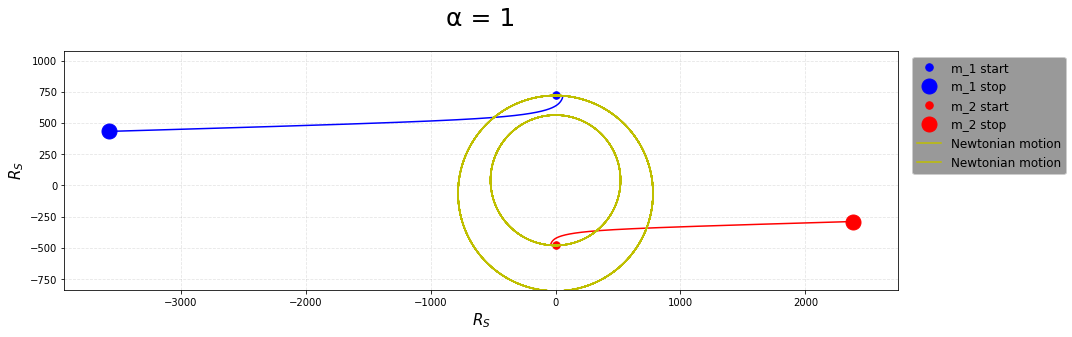

In [1]:
%run ./Functions_PM.ipynb

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

x_1 = np.array([0., 1000.])
x_2 = np.array([0., -200.])
v_1 = np.array([0.005, 0.])
v_2 = np.array([-0.01, 0.])
a_1 = np.array([0.,    0.])
a_2 = np.array([0.,    0.])
m_1 = 10e-2
m_2 = 15e-2

s = x_1, x_2, v_1, v_2, m_1, m_2

t_max = 1e7/2
res = 1e6
dt = t_max/res


positionsN = run_modelN(s, t_max=t_max, dt=dt, DL=True)
positions1, momenta1 = run_model(s, t_max=t_max, dt=dt, DL=True, return_momenta=True, α = 1)
# positions2, momenta2 = run_model(s, t_max=t_max, dt=dt, DL=True, return_momenta=True, α = 0)
# positions3, momenta3 = run_model(s, t_max=t_max, dt=dt, DL=True, return_momenta=True, α = 0.001)

Positions = [positions1]
Momenta = [momenta1]

M = slice(0, -1, 1)
# orbPlotter(positions, positionsN, slice = M)

# lim = 1e-2
# lims = (-lim, lim)
lims = 0
orbPlotter(positions1, positionsN, slice = M, xlim=lims, ylim=lims, DL = True, filename='α = 1', figsize=(15,5))
# orbPlotter(positions2, positionsN, slice = M, xlim=lims, ylim=lims, DL = True, filename='α = 0', figsize=(15,5))
# orbPlotter(positions3, positionsN, slice = M, xlim=lims, ylim=lims, DL = True, filename='α = 0.001', figsize=(15,5))

Code interrupted: Max distance


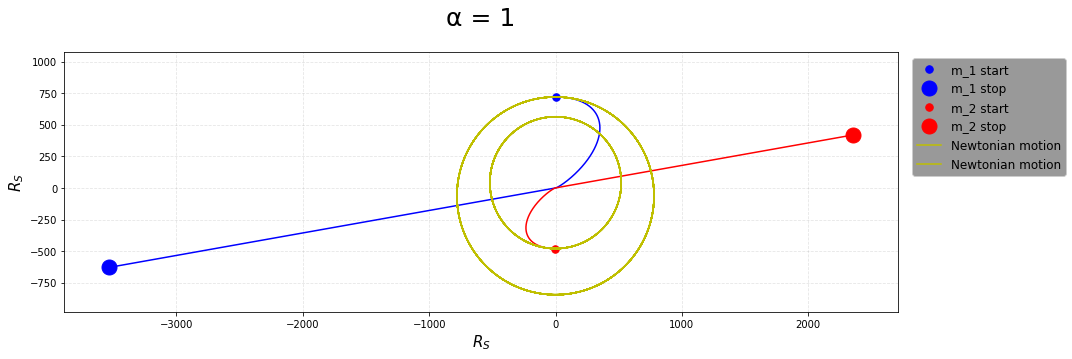

In [2]:
%run ./Functions_PM.ipynb

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

x_1 = np.array([0., 1000.])
x_2 = np.array([0., -200.])
v_1 = np.array([0.005, 0.])
v_2 = np.array([-0.01, 0.])
a_1 = np.array([0.,    0.])
a_2 = np.array([0.,    0.])
m_1 = 10e-2
m_2 = 15e-2

s = x_1, x_2, v_1, v_2, m_1, m_2

t_max = 1e7/2
res = 1e5
dt = t_max/res


positionsN = run_modelN(s, t_max=t_max, dt=dt, DL=True)
positions1, momenta1 = run_model(s, t_max=t_max, dt=dt, DL=True, return_momenta=True, α = 1)
# positions2, momenta2 = run_model(s, t_max=t_max, dt=dt, DL=True, return_momenta=True, α = 0)
# positions3, momenta3 = run_model(s, t_max=t_max, dt=dt, DL=True, return_momenta=True, α = 0.001)

Positions = [positions1]
Momenta = [momenta1]

M = slice(0, -1, 1)
# orbPlotter(positions, positionsN, slice = M)

# lim = 1e-2
# lims = (-lim, lim)
lims = 0
orbPlotter(positions1, positionsN, slice = M, xlim=lims, ylim=lims, DL = True, filename='α = 1', figsize=(15,5))
# orbPlotter(positions2, positionsN, slice = M, xlim=lims, ylim=lims, DL = True, filename='α = 0', figsize=(15,5))
# orbPlotter(positions3, positionsN, slice = M, xlim=lims, ylim=lims, DL = True, filename='α = 0.001', figsize=(15,5))

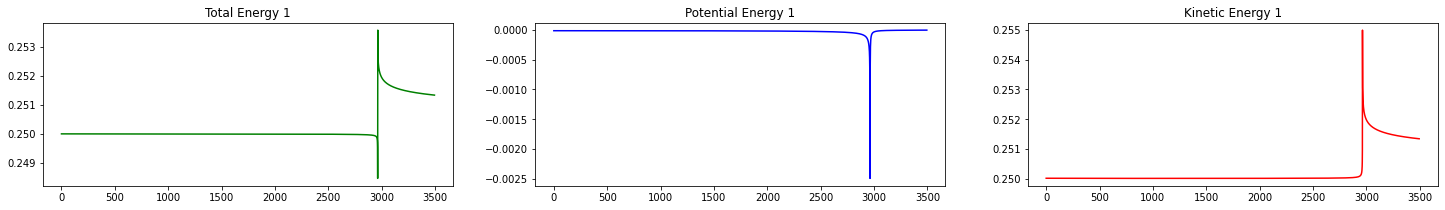

In [3]:
def V_1PM(x_1, x_2, P_1, P_2, m_1, m_2, DL):
    if DL == True:
        G, c = 1, 1
    else:
        c = const.c.value
        G = const.G.value
    r = rel_len(x_1, x_2)
    return G/r*((m_1*m_2)**2 - 2*fourdot(P_1, P_2)**2)/(P_1[0]*P_2[0])

for j in range(len(Momenta)):
    t = range(int(len(Momenta[j][0][0])))
    S = slice(0, int(len(Momenta[j][0][0])))
    # S = slice(0, -1)

    potential = []
    for i in range(len(Momenta[j][0][0])):
        x_1 = Positions[j][0][:,i]
        x_2 = Positions[j][1][:,i]
        P_1 = Momenta[j][0][:,i]
        P_2 = Momenta[j][1][:,i]
        potential.append(V_1PM(x_1, x_2, P_1, P_2, m_1, m_2, DL = True))


    fig, axs = plt.subplots(1,3, figsize=(25,3))
    ax1, ax2, ax3 = axs[0], axs[1], axs[2]

    ax1.ticklabel_format(useOffset=False)
    ax1.plot(t[S], Momenta[j][0][0][S]+Momenta[j][1][0][S]+potential[S], 'g')
    ax1.title.set_text(f'Total Energy {j+1}')

    ax2.ticklabel_format(useOffset=False)
    ax2.plot(t[S], potential[S], 'b')
    ax2.title.set_text(f'Potential Energy {j+1}')

    ax3.ticklabel_format(useOffset=False)
    ax3.plot(t[S], Momenta[j][0][0][S]+Momenta[j][1][0][S], 'r')
    ax3.title.set_text(f'Kinetic Energy {j+1}')



# Earth-Sun stuffs

In [ ]:
%run ./Functions_PM.ipynb
import scipy.signal as scipy

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

N_positions = []
PM_positions = []
PM_momenta = []
for j in [3,4]:
    m_1 = M_earth
    m_2 = M_sun
    v_1 = rotate(np.array([0., 29.29e3]), -np.pi*(1+j/7))
    v_2 = np.array([0.,         0.])
    x_1 = np.array([-152.100e9, 0.])
    x_2 = np.array([0.,         0.])
    s = x_1, x_2, v_1, v_2, m_1, m_2
    
    t_max = 1e9/6
    res = 2e5
    dt = t_max/res
    N_positions.append(run_modelN(s, t_max = t_max, dt = dt))
    positions, momenta = run_model(s, t_max = t_max, dt = dt, α=1, return_momenta=True)

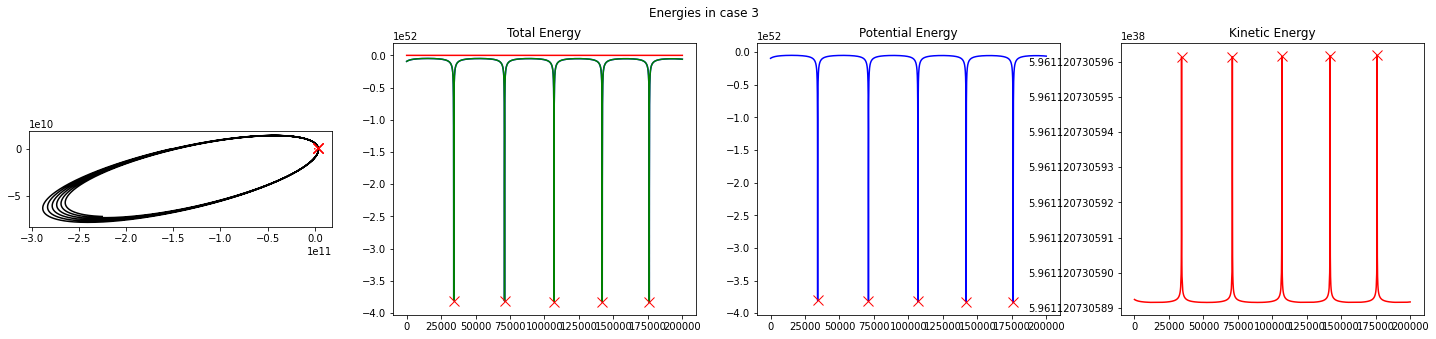

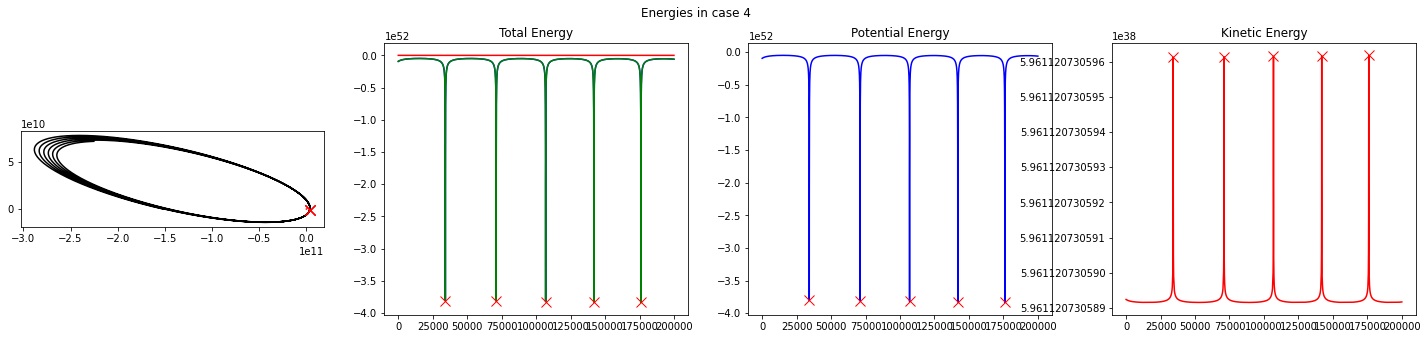

In [6]:
%run ./Functions_PM.ipynb
import scipy.signal as scipy

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

N_positions = []
PM_positions = []
PM_momenta = []
for j in [3,4]:
    m_1 = M_earth
    m_2 = M_sun
    v_1 = rotate(np.array([0., 29.29e3]), -np.pi*(1+j/7))
    v_2 = np.array([0.,         0.])
    x_1 = np.array([-152.100e9, 0.])
    x_2 = np.array([0.,         0.])
    s = x_1, x_2, v_1, v_2, m_1, m_2
    
    t_max = 1e9/6
    res = 2e5
    dt = t_max/res
    N_positions.append(run_modelN(s, t_max = t_max, dt = dt))
    positions, momenta = run_model(s, t_max = t_max, dt = dt, α=1, return_momenta=True)

    t = range(int(len(momenta[0,0])))
    S = slice(0, -1)

    potential = []
    for i in range(len(momenta[0,0])):
        x_1 = positions[0,:,i]
        x_2 = positions[1,:,i]
        P_1 = momenta[0,:,i]
        P_2 = momenta[1,:,i]
        potential.append(V_1PM(x_1, x_2, P_1, P_2, m_1, m_2, DL=False))


    fig, axs = plt.subplots(1,4, figsize=(25,5))
    fig.suptitle(f"Energies in case {j}")
    ax1, ax2, ax3, ax4 = axs[0], axs[1], axs[2], axs[3]

    ax2.ticklabel_format(useOffset=False)
    ax2.plot(t[S], potential[S], 'b')
    ax2.plot(t[S], momenta[0,0,S]+momenta[1,0,S], 'r')
    ax2.plot(t[S], momenta[0,0,S]+momenta[1,0,S]+potential[S], 'g')

    extrema = scipy.argrelextrema(np.array(momenta[0,0,S]+momenta[1,0,S]+potential[S]), np.less)
    for i in extrema[0]:
        i = int(i)
        ax2.plot(i, momenta[0,0,i]+momenta[1,0,i]+potential[i], 'rx', markersize=10)
    ax2.title.set_text('Total Energy')


    ax3.ticklabel_format(useOffset=False)
    ax3.plot(t[S], potential[S], 'b')

    extrema = scipy.argrelextrema(np.array(potential[S]), np.less)
    for i in extrema[0]:
        i = int(i)
        ax3.plot(i, potential[i], 'rx', markersize=10)
    ax3.title.set_text('Potential Energy')


    ax4.ticklabel_format(useOffset=False)
    ax4.plot(t[S], momenta[0,0,S]+momenta[1,0,S], 'r')

    extrema = scipy.argrelextrema(np.array(momenta[0,0,S]+momenta[1,0,S]), np.greater)
    for i in extrema[0]:
        i = int(i)
        # print(i, momenta[0,0,i]+momenta[1,0,i]+potential[i])
        ax4.plot(i, momenta[0,0,i]+momenta[1,0,i], 'rx', markersize=10)
    ax4.title.set_text('Kinetic Energy')

    ax1.ticklabel_format(useOffset=False)
    ax1.set_aspect('equal')
    ax1.plot(positions[0][0], positions[0][1], 'k')
    ax1.plot(positions[1][0], positions[1][1], 'r')
    for k in extrema[0]:
        k = int(k)
        ax1.plot(positions[0][0][k], positions[0][1][k], 'rx', markersize=10)

    PM_positions.append(positions)
    PM_momenta.append(momenta)

# t_max = 1e8/3
# dt = t_max/5e4
# ~5 min STABILIZED